In [5]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [7]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\banda\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [16]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('positive_tweets.json')
print(f"{len(pos_tweets)=}, {len(neg_tweets)=}")

len(pos_tweets)=5000, len(neg_tweets)=5000


In [19]:
neg_tweets[:10]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

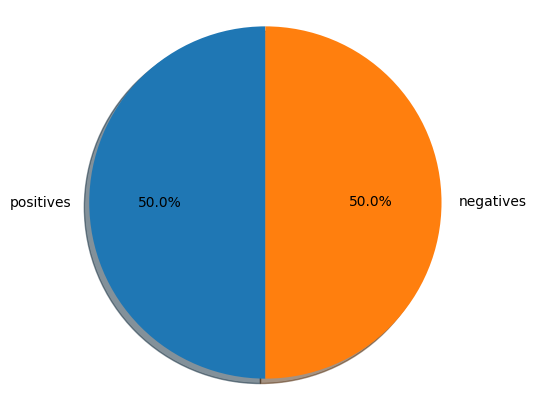

In [21]:
plt.figure(figsize=(5,5))
sizes = [len(pos_tweets), len(neg_tweets)]
plt.pie(sizes, labels=('positives', 'negatives'), autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

### Preporocessing

In [29]:
tweet = pos_tweets[2277]
tweet

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [43]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
# remove hashtags (only # from the word)
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [47]:
print('\033[92m' + tweet)
print('\033[94m')

tweet2 = re.sub(r'^RT[\s]+', '', tweet)
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [51]:
print()
print('\033[92m'+tweet2)
print('\033[92m')

#instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)
print()
print('Tokenized string')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [70]:
# Import english stop words list from NLTK
stopwords_english = stopwords.words('english')
stopwords_english = set(stopwords_english) # quicker lookup
print(stopwords_english)
print('\nPunctuation\n')
print(string.punctuation)


{'its', 'how', 'just', 'now', 'no', 'at', 'his', 'an', "hadn't", 'own', 'all', 'because', 'it', 'when', 'or', 'before', 'from', 'under', 'll', "weren't", 't', 'below', 'in', "shan't", 'does', 'not', "haven't", 'him', 'have', 'you', 'myself', 'above', 'down', 'been', 'whom', 'with', 'up', 'for', 'those', "won't", 'some', 'was', 'hers', 'm', 'aren', 'during', 'am', 're', "hasn't", 'into', "wouldn't", 'yourself', "you're", 'herself', "didn't", 'can', "couldn't", 'further', 'itself', 'their', 'most', 'and', 'about', 'if', 'ourselves', 'being', 'he', "you've", 'while', 'wouldn', 'had', "mustn't", 'through', 'me', 'shan', "it's", 'same', 'which', 'she', 'nor', 'such', 'but', 'them', 'both', 'these', 'be', "aren't", 'to', 'theirs', 'what', 'too', 'should', 'don', 'our', "you'll", 'hasn', 'the', "shouldn't", 'weren', 've', "don't", 'will', 'd', 'having', 'so', 'her', "doesn't", 'has', 'do', 'couldn', "needn't", 'off', 'very', 'ma', 'on', 'again', 'are', 'himself', 'once', 'why', 'did', 'any', 

In [73]:
from datetime import datetime
import time

tweets_clean = []

for word in tweet_tokens:
    if (word not in stopwords_english and
        word not in string.punctuation):
        tweets_clean.append(word)



In [76]:
print(tweets_clean)

stemmer = PorterStemmer()

tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

print('stemmed words:')
print(tweets_stem)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
